In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Read dataset and look in detail

In [63]:
churnData = pd.read_csv('./files_for_lab/Customer-Churn.csv')

In [64]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

# Clean and change data types

In [66]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [67]:
churnData['TotalCharges'].isna().sum()

np.int64(11)

In [68]:
churnData = churnData.dropna(subset=['TotalCharges'])

In [69]:
churnData['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


# Select features and target

In [70]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = churnData[features]

In [71]:
y = churnData['Churn'].map({'Yes': 1, 'No': 0})

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
model = LogisticRegression()

# Check imbalance 

C:\Users\User\AppData\Local\Temp\ipykernel_5084\3403320591.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(y)


<Axes: xlabel='Churn'>

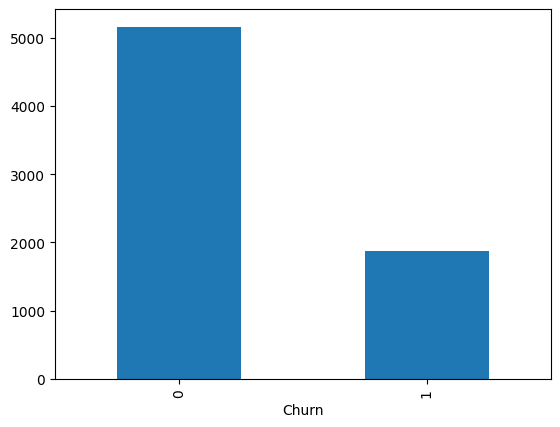

In [74]:
count_classes = pd.value_counts(y)
count_classes.plot(kind = 'bar')

In [75]:
train = pd.concat([X_train, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
4090,1,0,49.90,49.90,0
1420,60,0,99.80,5985.75,0
5600,7,0,69.95,529.50,1
1178,15,0,101.35,1553.95,1
4131,1,0,20.25,20.25,1


In [76]:
no = train[train['Churn']==0]
yes = train[train['Churn']==1]

In [77]:
display(no.shape)
display(yes.shape)

(4133, 5)

(1492, 5)

# Oversampling and undersampling

In [78]:
yes_oversampled = resample(yes, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = (int(len(no)/2)),#<- make both sets the same size
                                random_state=0)

In [79]:
display(yes_oversampled.shape)
display(no.shape)

(2066, 5)

(4133, 5)

In [80]:
no_oversampled = resample(no, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(yes_oversampled),#<- make both sets the same size
                                random_state=0)

In [81]:
display(yes_oversampled.shape)
display(no_oversampled.shape)

(2066, 5)

(2066, 5)

In [82]:
train_oversampled = pd.concat([no_oversampled,yes_oversampled])
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
3965,52,1,106.50,5621.85,0
6139,3,0,20.20,50.60,0
3760,3,0,73.60,232.50,0
175,34,0,24.70,780.20,0
4404,24,0,89.55,2187.15,0


In [84]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [85]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4875444839857651
recall:  0.726790450928382
f1:  0.5835995740149095
